<a href="https://colab.research.google.com/github/SenolIsci/financial_data_analysis_ML_RL/blob/main/crypto_autonomus_trading_reinforcement_learniing_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reinforcement Learning (Q-Learning) in an Algorithmic Trading Framework

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/Colab Notebooks/Financial Engineering and AI/')
!ls

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
df0 = pd.read_csv('hitbtc_BTC_USDT_data_15m_1256.csv', index_col="timestamp", parse_dates=True)


In [ ]:
df0.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'VolumeQuote', 'TR', 'ATR_5',
       'SLOPE_5', 'PATR_5', 'EMA_5', 'EMA_10', 'SO%k_14', 'SO%d_14_3',
       'MACD_12_26', 'MACDsign_9_12_26', 'MACDdiff_12_26', 'Momentum_1',
       'ROC_1', 'FI_10', 'ADX_10_14', 'PosDI', 'NegDI', 'RSI_10', 'MFI_12',
       'Last', 'Indc_MACD_12_26', 'Indc_RSI_10', 'Indc_MFI_12', 'Indc_SO%k_14',
       'Indc_DMI', 'Indc_MACDdiff_12_26', 'Indc_ADX_10_14', 'Indc_PATR_5',
       'Indc_ATR_5', 'Indc_SLOPE_5', 'LocalMinMax'],
      dtype='object')

In [ ]:
df0.dropna(axis=0, how='any', inplace=True)


In [ ]:
df0.dropna(axis=1, how='any', inplace=True)

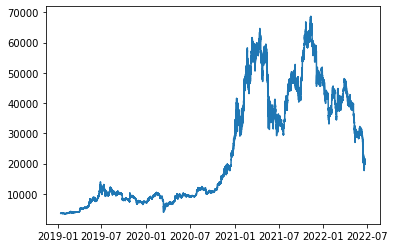

In [ ]:
plt.plot(df0['Close']) 

In [ ]:
df0[0:10].head()

,Close,High,Low,Open,Volume,VolumeQuote,TR,ATR_5,SLOPE_5,PATR_5,...,Indc_RSI_10,Indc_MFI_12,Indc_SO%k_14,Indc_DMI,Indc_MACDdiff_12_26,Indc_ADX_10_14,Indc_PATR_5,Indc_ATR_5,Indc_SLOPE_5,LocalMinMax
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-14 04:30:00+00:00,3512.03,3514.97,3511.75,3513.50,107.95,379123.6385,3.22,3.996,1.315,0.113780,...,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,BUYSELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL
2019-01-14 04:45:00+00:00,3516.34,3517.09,3511.40,3512.15,70.26,247058.0484,5.69,4.918,2.359,0.139861,...,NEUTRAL,NEUTRAL,SELL,NEUTRAL,NEUTRAL,BUYSELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL
2019-01-14 05:00:00+00:00,3517.40,3524.86,3515.95,3516.85,12.08,42490.1920,8.91,5.878,1.927,0.167112,...,SELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,BUYSELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL
2019-01-14 05:15:00+00:00,3520.46,3521.46,3515.09,3517.00,3.31,11652.7226,6.37,5.982,1.967,0.169921,...,SELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,BUYSELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL
2019-01-14 05:30:00+00:00,3532.21,3537.00,3520.43,3520.43,95.42,337043.4782,16.57,8.152,4.448,0.230790,...,SELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL,BUYSELL,NEUTRAL,NEUTRAL,NEUTRAL,NEUTRAL


In [ ]:

df0['log_return'] = np.log(df0['Close']).diff()

In [ ]:
df0.dropna(axis=0, how='any', inplace=True)

In [ ]:
#features to be used as state. rewards are the stock log returns of 'Close' price.  
feats = ['RSI_10','MACD_12_26']

In [ ]:
X_feat=df0[feats]

In [ ]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = MinMaxScaler()   #StandardScaler()
#X_feat_array=scaler.fit_transform(df0[feats])
#X_feat = pd.DataFrame(X_feat_array, columns = feats,index=df0.index)

In [ ]:
#create new dataframe
df_returns=pd.concat([df0['log_return'],X_feat],axis=1)

In [ ]:
df_returns.head()

,log_return,RSI_10,MACD_12_26
timestamp,,,
2019-01-14 04:45:00+00:00,0.001226,0.708640,3.706390
2019-01-14 05:00:00+00:00,0.000301,0.838986,4.001531
2019-01-14 05:15:00+00:00,0.000870,0.791108,4.417534
2019-01-14 05:30:00+00:00,0.003332,0.907583,5.583387
2019-01-14 05:45:00+00:00,-0.001629,0.907583,5.993945


In [ ]:
#PARAMETERS
test_percentage=0.2

#State Discritizer
n_bins=6
n_samples=1000  #number of state samples collcted by randomly selecting actions

#environment and agent params
num_episodes = 100
gamma = 0.7  # discount rate
epsilon = 0.1 #epsilon greedy 
learning_rate =  1e-1    #Q-learning update rate
action_space=[0, 1, 2] # BUY, SELL, HOLD

In [ ]:
# split into train and test
Ntest = int(len(df_returns)*test_percentage)
train_data = df_returns.iloc[:-Ntest]
test_data = df_returns.iloc[-Ntest:]

In [ ]:
class Env:
  def __init__(self, df):
    self.df = df
    self.n = len(df)
    self.current_idx = 0
    self.action_space = action_space
    self.invested = 0

    self.states = self.df[feats].to_numpy()
    self.rewards = self.df['log_return'].to_numpy()
    # buy and hold return
    self.total_buy_and_hold = 0

  def reset(self):
    self.current_idx = 0
    self.total_buy_and_hold = 0
    return self.states[self.current_idx]

  def step(self, action):
    # need to return (next_state, reward, done)

    self.current_idx += 1
    if self.current_idx >= self.n:
      raise Exception("Episode already done")

    if action == 0: # BUY
      self.invested = 1
    elif action == 1: # SELL
      self.invested = 0
    
    # compute reward
    if self.invested:
      reward = self.rewards[self.current_idx]
    else:
      reward = 0

    # state transition
    next_state = self.states[self.current_idx]

        # baseline
    self.total_buy_and_hold += self.rewards[self.current_idx]

    done = (self.current_idx == self.n - 1)
    return next_state, reward, done

In [ ]:
class StateDiscritizer:
  #class to discritize continuous states to discrete states by binning for Q-table. States vs Actions tables. 
  def __init__(self, env, n_bins=n_bins, n_samples=n_samples):
    # first, collect sample states from the environment
    states = []
    done = False
    s = env.reset()
    self.D = len(s) # number of elements we need to bin
    states.append(s)
    for _ in range(n_samples):
      a = np.random.choice(env.action_space)
      s2, _, done = env.step(a)
      states.append(s2)
      if done:
        s = env.reset()
        states.append(s)

    # convert to numpy array for easy indexing
    states = np.array(states)

    # create the bins for each dimension
    self.bins = []
    for d in range(self.D):
      column = np.sort(states[:,d])

      # find the boundaries for each bin
      current_bin = []
      for k in range(n_bins):
        boundary = column[int(n_samples / n_bins * (k + 0.5))]
        current_bin.append(boundary)

      self.bins.append(current_bin)


  def transform(self, state):
    x = np.zeros(self.D)
    for d in range(self.D):
      x[d] = int(np.digitize(state[d], self.bins[d]))
    return tuple(x)


  def all_possible_states(self):
    list_of_bins = []
    for d in range(self.D):
      list_of_bins.append(list(range(len(self.bins[d]) + 1)))
    # print(list_of_bins)
    return itertools.product(*list_of_bins)

In [ ]:
class Agent:
  def __init__(self, action_size, state_discr):
    self.action_size = action_size
    self.gamma = gamma  # discount rate
    self.epsilon = epsilon
    self.learning_rate =  learning_rate
    self.state_discr = state_discr

    # initialize Q-table randomly
    self.Q = {}
    for s in self.state_discr.all_possible_states():
      s = tuple(s)
      for a in range(self.action_size):
        self.Q[(s,a)] = np.random.randn()

  def act(self, state):
    if np.random.rand() <= self.epsilon:
      return np.random.choice(self.action_size)

    s = self.state_discr.transform(state)
    act_values = [self.Q[(s,a)] for a in range(self.action_size)]
    return np.argmax(act_values)  # returns action

  def train(self, state, action, reward, next_state, done):
    s = self.state_discr.transform(state)
    s2 = self.state_discr.transform(next_state)

    if done:
      target = reward
    else:
      act_values = [self.Q[(s2,a)] for a in range(self.action_size)]
      target = reward + self.gamma * np.amax(act_values)

    # Run one training step
    self.Q[(s,action)] += self.learning_rate * (target - self.Q[(s,action)])

In [ ]:
def play_one_episode(agent, env, is_train):
  state = env.reset()
  done = False
  total_reward = 0

  while not done:
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    total_reward += reward
    if is_train:
      agent.train(state, action, reward, next_state, done)
    state = next_state

  return total_reward

In [ ]:
train_env = Env(train_data)
test_env = Env(test_data)

In [ ]:
action_size = len(train_env.action_space)
state_discr = StateDiscritizer(train_env)
agent = Agent(action_size, state_discr)

In [ ]:
train_rewards = np.empty(num_episodes)
test_rewards = np.empty(num_episodes)

In [ ]:
for e in range(num_episodes):
  r = play_one_episode(agent, train_env, is_train=True)
  train_rewards[e] = r

  # test on the test set
  tmp_epsilon = agent.epsilon
  agent.epsilon = 0.
  tr = play_one_episode(agent, test_env, is_train=False)
  agent.epsilon = tmp_epsilon
  test_rewards[e] = tr

  print(f"eps: {e + 1}/{num_episodes}, train: {r:.5f}, test: {tr:.5f}")

eps: 1/100, train: 0.11902, test: -0.12366
eps: 2/100, train: -0.22457, test: -0.26126
eps: 3/100, train: 0.16587, test: -0.13975
eps: 4/100, train: -0.05426, test: -0.01529
eps: 5/100, train: -0.63078, test: -0.05560
eps: 6/100, train: 0.15028, test: -0.17132
eps: 7/100, train: -0.10273, test: -0.00785
eps: 8/100, train: 0.63096, test: -0.12734
eps: 9/100, train: 0.17741, test: -0.03178
eps: 10/100, train: -0.60955, test: -0.05716
eps: 11/100, train: -0.51232, test: 0.41900
eps: 12/100, train: -0.14114, test: 0.02132
eps: 13/100, train: -0.41139, test: -0.16039
eps: 14/100, train: -0.64059, test: -0.25039
eps: 15/100, train: 1.26020, test: 0.00155
eps: 16/100, train: -0.40126, test: -0.00033
eps: 17/100, train: 0.48894, test: 0.00436
eps: 18/100, train: -0.62012, test: -0.26914
eps: 19/100, train: 0.18598, test: 0.06556
eps: 20/100, train: 0.21751, test: -0.01138
eps: 21/100, train: 0.16958, test: -0.02540
eps: 22/100, train: 0.34907, test: -0.26413
eps: 23/100, train: 0.00031, test: 

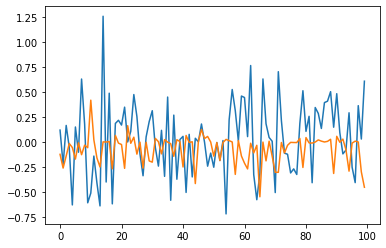

In [ ]:
plt.plot(train_rewards)
plt.plot(test_rewards);

In [ ]:
train_env.total_buy_and_hold,test_env.total_buy_and_hold


(2.7901094939852467, -1.0528103060129457)